In [2]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

kütüphaneler import edildi

In [3]:
df = pd.read_csv("netflix price in different countries.csv")

# Exploratory Data Analysis

In [5]:
#verisetinde bulunan verilere ilişkin bilgi veren fonksiyonun tanımlanması.
def check_df(dataframe):
    print("Boyut")
    print(dataframe.shape)
    print("\nSütunlar")
    print(dataframe.columns)
    print("\nBilgiler")
    dataframe.info()
    print("Veri Tipleri")
    print(dataframe.dtypes)
    print("ilk 5 örnek")
    print(dataframe.head())
    print("Son 5 örnek")
    print(dataframe.tail())

In [6]:
check_df(df)

Boyut
(65, 7)

Sütunlar
Index(['Country', 'Total Library Size', 'No. of TV Shows', 'No. of Movies',
       'Cost Per Month - Basic ($)', 'Cost Per Month - Standard ($)',
       'Cost Per Month - Premium ($)'],
      dtype='object')

Bilgiler
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65 entries, 0 to 64
Data columns (total 7 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        65 non-null     object 
 1   Total Library Size             65 non-null     int64  
 2   No. of TV Shows                65 non-null     int64  
 3   No. of Movies                  65 non-null     int64  
 4   Cost Per Month - Basic ($)     65 non-null     float64
 5   Cost Per Month - Standard ($)  65 non-null     float64
 6   Cost Per Month - Premium ($)   65 non-null     float64
dtypes: float64(3), int64(3), object(1)
memory usage: 3.7+ KB
Veri Tipleri
Country                           object


In [7]:
#veri setiyle ilgili bazı istatistiksel özelliklerin incelenmesi
df.describe()

,Total Library Size,No. of TV Shows,No. of Movies,Cost Per Month - Basic ($),Cost Per Month - Standard ($),Cost Per Month - Premium ($)
count,65.000,65.000,65.000,65.000,65.000,65.000
mean,5314.415,3518.954,1795.462,8.368,11.990,15.613
std,980.323,723.011,327.280,1.938,2.864,4.041
min,2274.000,1675.000,373.000,1.970,3.000,4.020
25%,4948.000,3154.000,1628.000,7.990,10.710,13.540
50%,5195.000,3512.000,1841.000,8.990,11.490,14.450
75%,5952.000,3832.000,1980.000,9.030,13.540,18.060
max,7325.000,5234.000,2387.000,12.880,20.460,26.960


In [8]:
#bu fonksiyonun amacı dataframei girdi olarak alıp, sütunları veri türlerine ve kardinalitelerine göre
#ayırt etmektir.
def column_detection(dataframe: pd.DataFrame, cat_th: int = 10, car_th: int = 20):
    #kategorik olan sütunları ayıklama
    cat_cols = [col for col in dataframe.columns if dataframe[col].dtypes == "O"]
    #sayı olmasına rağmen kategorik olan sütunları ayıklama.
    num_but_cat = [col for col in dataframe.columns if dataframe[col].nunique() < cat_th and
                       dataframe[col].dtypes != "O"]
    #kategorik olan ama kardinalite ifade eden sütunlar.
    cat_but_car = [col for col in dataframe.columns if dataframe[col].nunique() > car_th and
                    dataframe[col].dtypes == "O"]
    #kategorik olanları bir araya getirip, cardinal olanları cıakrarak ayıklama.
    cat_cols = cat_cols + num_but_cat
    cat_cols = [col for col in cat_cols if col not in cat_but_car]

    # numerik olan sütunları ayıklama.
    num_cols = [col for col in dataframe.columns if dataframe[col].dtypes != "O"]
    num_cols = [col for col in num_cols if col not in num_but_cat]

    print("\nKategorik olanlar")
    print(cat_cols)
    print("\nNumerik olanlar")
    print(num_cols)
    print("\nKAtegorik olup kardinal olmayanlar")
    print(cat_but_car)
    print("\n Numerik ve Kategorik olanlar")
    print(num_but_cat)
    print("\nSütun overview")
    print(f"Observations: {dataframe.shape[0]}")
    print(f"Variables: {dataframe.shape[1]}")
    print(f'cat_cols: {len(cat_cols)}')
    print(f'num_cols: {len(num_cols)}')
    print(f'cat_but_car: {len(cat_but_car)}')
    print(f'num_but_cat: {len(num_but_cat)}')
    return cat_cols, num_cols, cat_but_car, num_but_cat

In [10]:
#oluşan sınıflandırmaları yazdırma.
cat_cols, num_cols, cat_but_car, num_but_cat = column_detection(df)


Kategorik olanlar
[]

Numerik olanlar
['Total Library Size', 'No. of TV Shows', 'No. of Movies', 'Cost Per Month - Basic ($)', 'Cost Per Month - Standard ($)', 'Cost Per Month - Premium ($)']

KAtegorik olup kardinal olmayanlar
['Country']

 Numerik ve Kategorik olanlar
[]

Sütun overview
Observations: 65
Variables: 7
cat_cols: 0
num_cols: 6
cat_but_car: 1
num_but_cat: 0


Bu kod bloğunda her ülkenin verileri için netflix kütüphane büyüklüğü, film sayısı,dizi sayısı, paketlere göre ücretin grafikleri oluşturuldu.

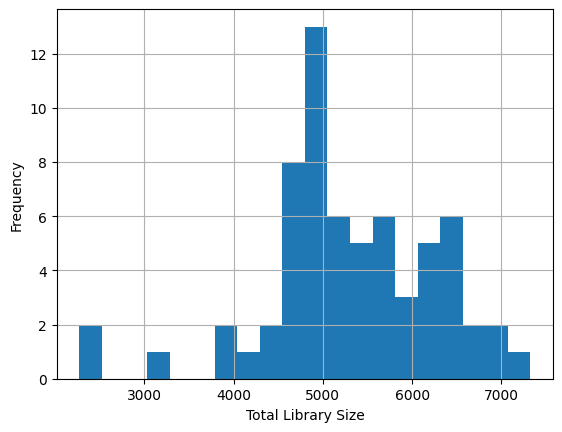

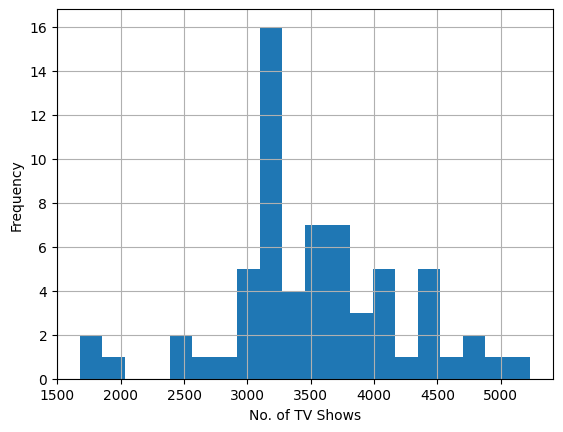

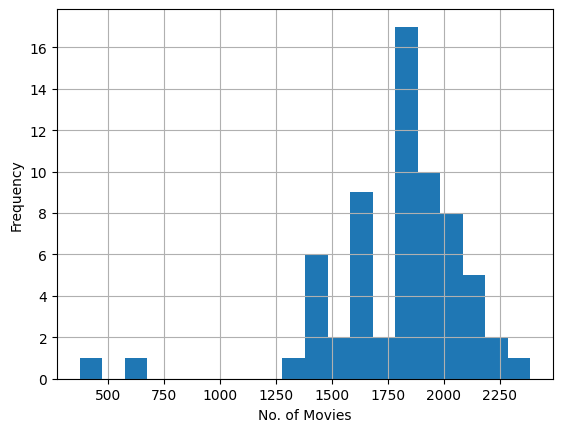

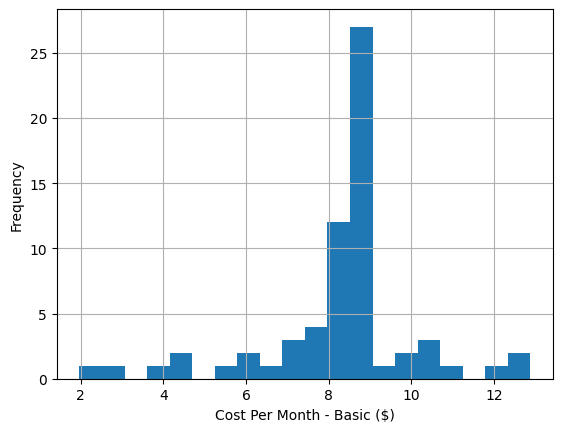

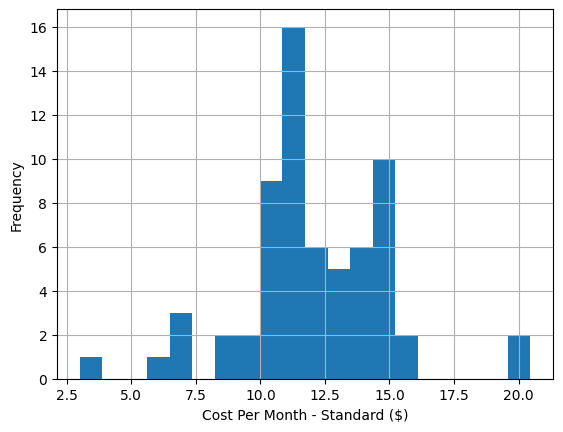

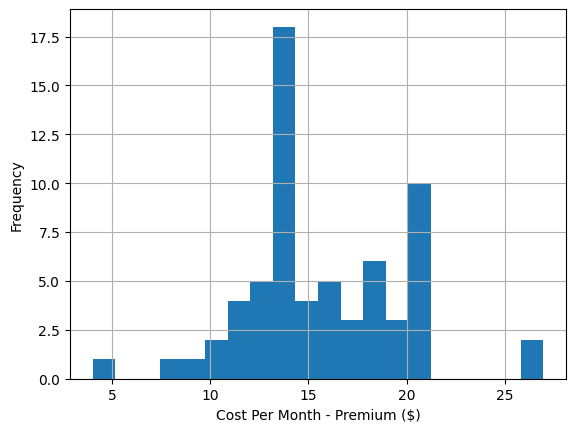

In [11]:
def cat_summary(dataframe, col_name, plot=True):
    print(pd.DataFrame({col_name: dataframe[col_name].value_counts(),
                        "Ratio": 100 * dataframe[col_name].value_counts() / len(dataframe)}))

    if plot:
        sns.countplot(x=dataframe[col_name], data=dataframe)
        plt.show(block=True)


for col in cat_cols:
    cat_summary(df, col)


def hist_num_columns_show(dataframe, num_column):
    dataframe[num_column].hist(bins=20)
    plt.xlabel(num_column)
    plt.ylabel("Frequency")
    plt.show(block=True)


for num_col in num_cols:
    hist_num_columns_show(df, num_col)

# Data Visualization

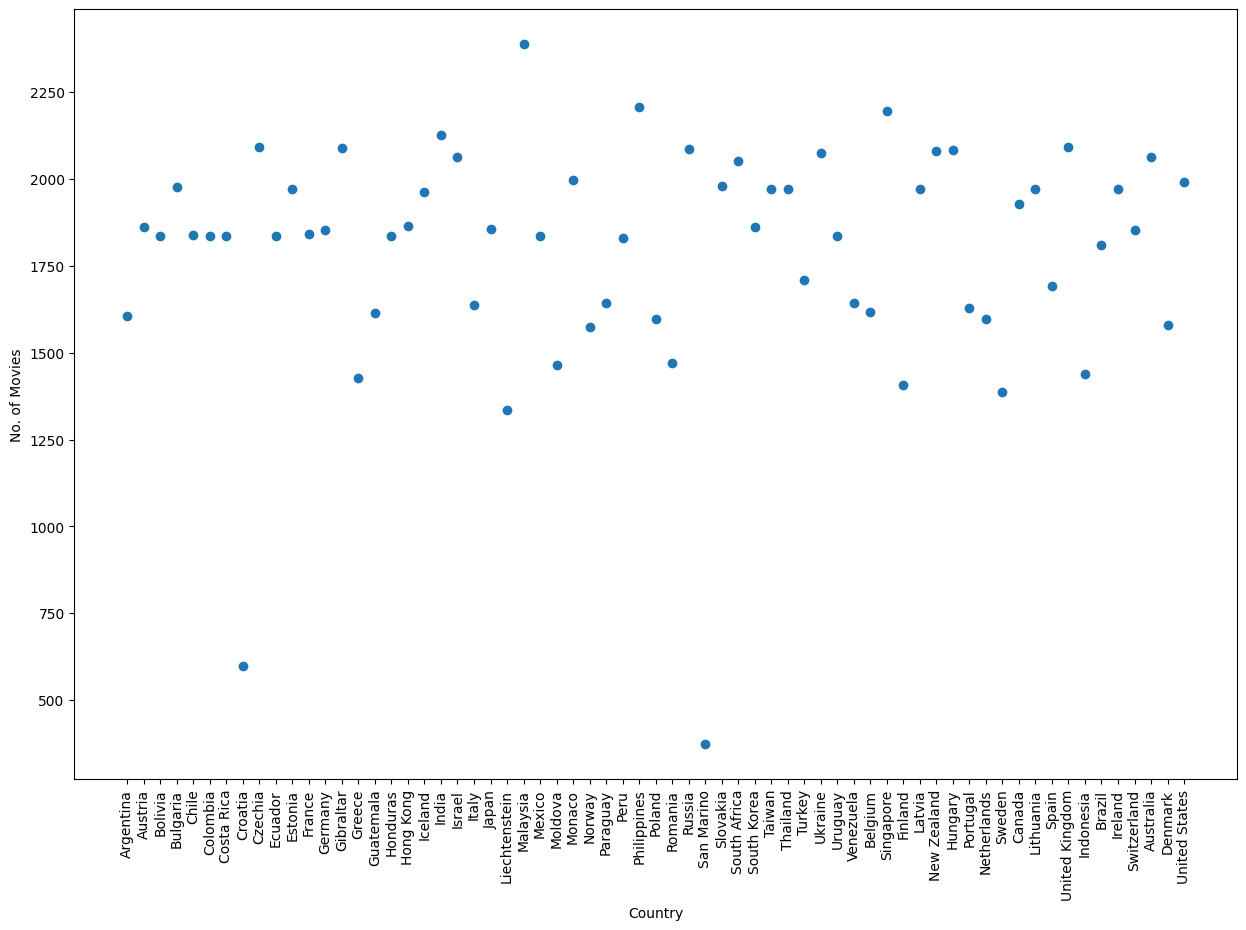

In [12]:
#bu kod bloğunda ülkeler ile kütüphanede yer alan film sayılarının grafiği oluşturuldu.
plt.figure(figsize=(15,10))
plt.scatter('Country',"No. of Movies" , data=df)
plt.xticks(rotation=90)
plt.xlabel('Country')
plt.ylabel('No. of Movies')
plt.show()

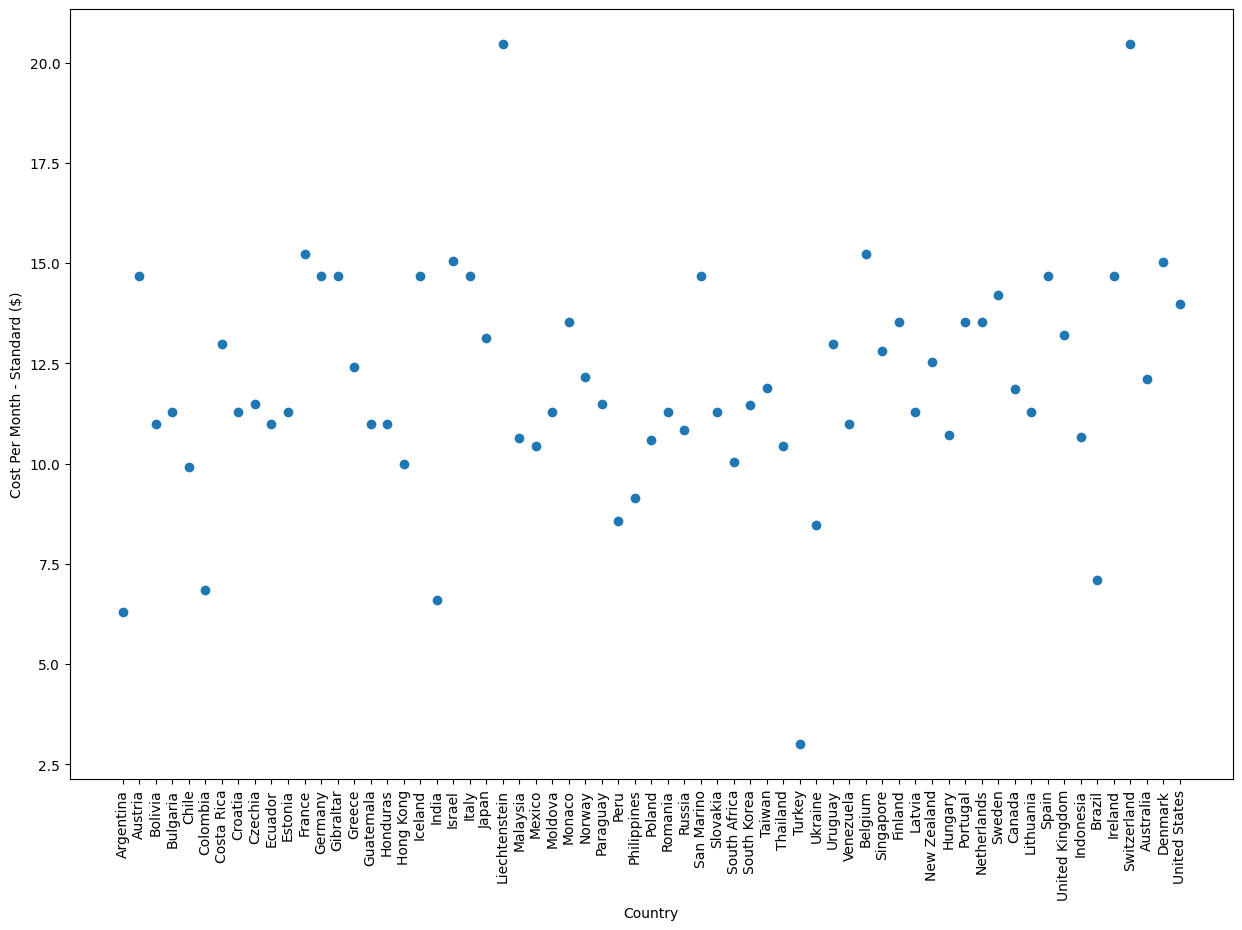

In [14]:
#bu kod bloğunda ülkeler ile standart paketin aylık fiyatı arasındaki ilişkiler grafiğe döküldü
plt.figure(figsize=(15,10))
plt.scatter('Country',"Cost Per Month - Standard ($)" , data=df)
plt.xticks(rotation=90)
plt.xlabel('Country')
plt.ylabel('Cost Per Month - Standard ($)')
plt.show()

# Variablelar arası ilişkiler

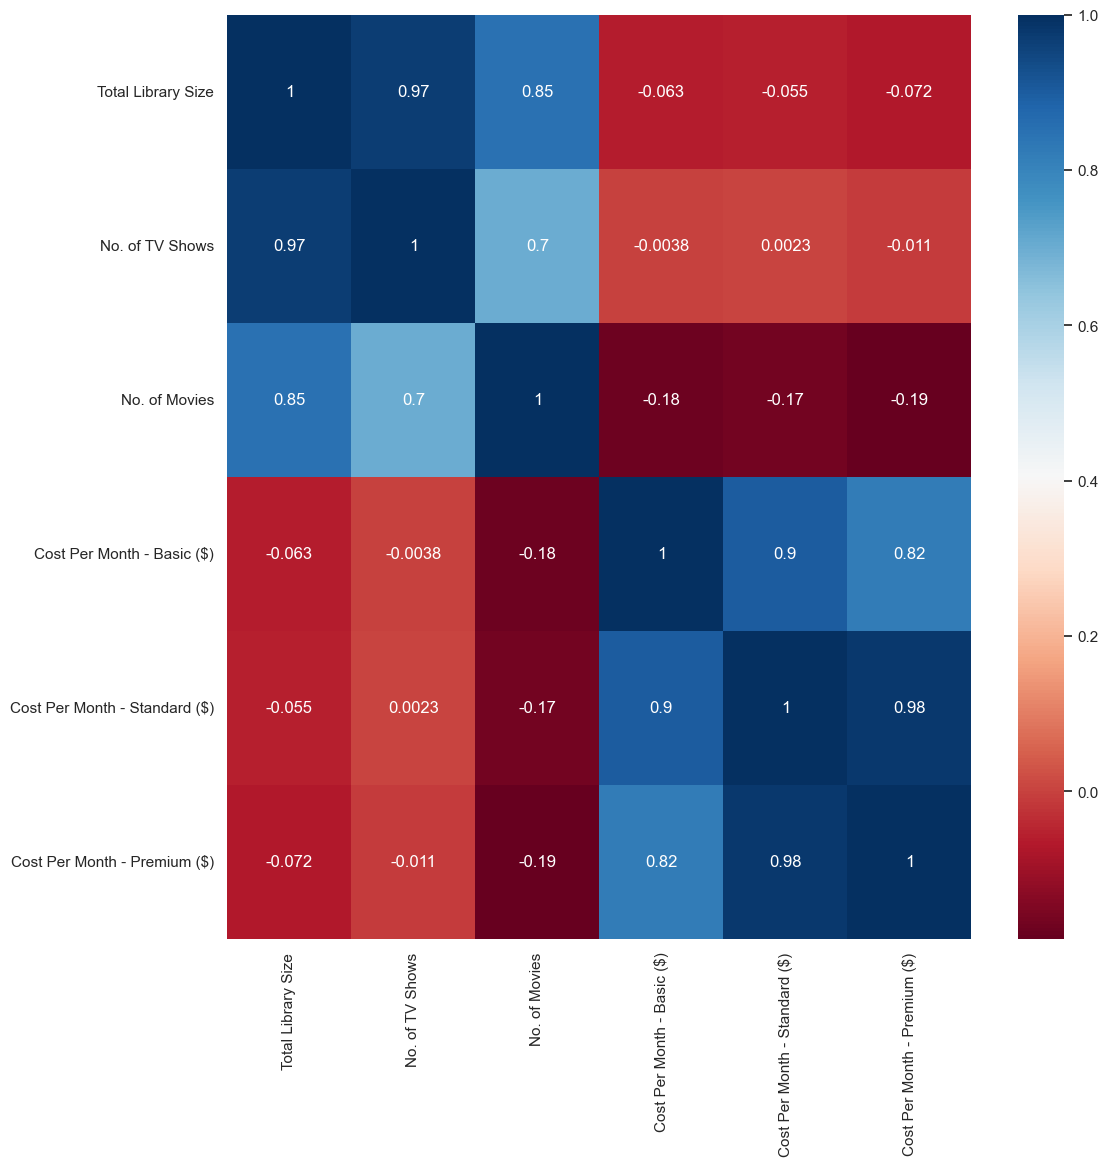

In [15]:
#bu kod bloğu veriler arasındaki korelasyon değerlerini gösterir
#-1 ters orantı +1 doğru oantı olmak üzere ilişkiler resmedilir.
corr = df[num_cols].corr()

sns.set(rc={'figure.figsize': (12, 12)})
sns.heatmap(corr, cmap="RdBu", annot=True)
plt.show()

Görüldüğü üzere ana köşegende bütün değerler 1 olarak görünüyor. Bunun sebebi ana köşegende kesişen veriler aynı veriler birbirleriyle tamamen uyumlu oldukları için korelasyon değerleride 1 olarak görünüyor.

Ayrıca dikkat edilirse basic standart ve premium fiyatlandırmalar arasındada pozitif korelasyon var. Bunun sebebi paket yükseldikçe fiyatların yükselmesi doğal olarak birbirleri arasında doğru orantı bulunuyor.

Ayrıca kütüphanede bulunan film, dizi sayısının fiyatlandırma arasında korelasyon olmadığı görülüyor.